# predicting the heart-disease using machine-learning

# 1 problem defintion
> given clinical data of a petient try to predict a binary prediction whether they have heart-disease or not

# 2 data

> the data set here we use is UCI machine learning repository 

> link http://archive.ics.uci.edu/ml/datasets/Heart+Disease
> https://www.kaggle.com/ronitf/heart-disease-uci

## 3. evaluation

> if we get 95% of whether the person have heart disease or not during the proof of concept we persue our project

## 4. features
> **create data dictionary**

**information about our featureas**

* ageage in years
* sex(1 = male; 0 = female)
* cpchest pain type
* trestbpsresting blood pressure (in mm Hg on admission to the hospital)
* cholserum cholestoral in mg/dl
* fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecgresting electrocardiographic results
* thalachmaximum heart rate achieved
* exangexercise induced angina (1 = yes; 0 = no)
* oldpeakST depression induced by exercise relative to rest
* lopethe slope of the peak exercise ST segment
* canumber of major vessels (0-3) colored by flourosopy
* thal3 = normal; 6 = fixed defect; 7 = reversable defect
* target1 or 0

In [1]:
# preparing the tools
#import pandas, numpy, matplotlib,
 



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# import model 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# import model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

C:\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### load data

In [4]:
data = pd.read_csv("heart-disease.csv")
# data.isna().sum() no missing data

### data exploration or EDA

* what question are you going to solve
* what kind of data do you have and how to work with it
* is there a nissing data how u fix that if you have 
* how can you add,change or remove features to get the best output

In [4]:
#df["target"].value_counts()

In [5]:
#df["target"].value_counts().plot(kind="bar", color = ["red","green"]);

In [6]:
#df.info()

In [7]:
#df.describe()

### heart disease frequency according to sex


In [4]:
#data["sex"].value_counts()    below also the same
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

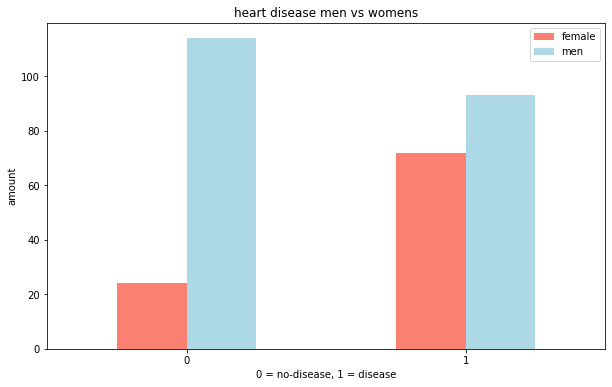

In [5]:
pd.crosstab(data.target,data.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color = ["salmon", "lightblue"]);
plt.title("heart disease men vs womens")
plt.xlabel("0 = no-disease, 1 = disease")
plt.ylabel("amount")
plt.legend(["female", "men"])
plt.xticks(rotation=0);
                                    

In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### age vs max. heart rate for heart-disease

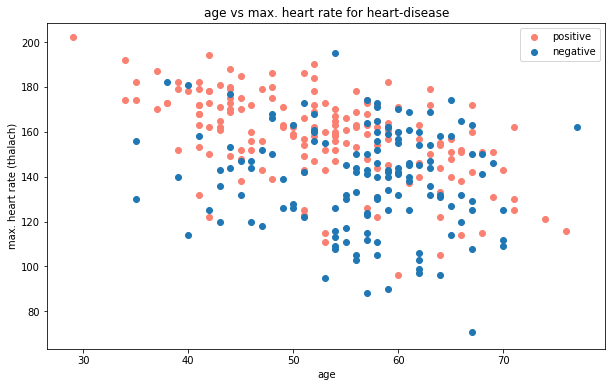

In [6]:
# lets plot
plt.figure(figsize = (10,6))
# positive plot
plt.scatter(data.age[data.target == 1],
           data.thalach[data.target == 1],
           color = "salmon")
# negative plot
plt.scatter(data.age[data.target == 0],
           data.thalach[data.target == 0]);
plt.title("age vs max. heart rate for heart-disease")
plt.xlabel("age")
plt.ylabel("max. heart rate (thalach)")
plt.legend(["positive", "negative"]);

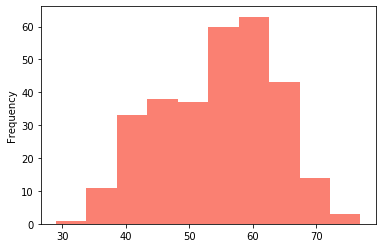

In [7]:
#pd.crosstab(data.target, data.sex)
# let see the distribution of the age

#data.age.plot(kind = "hist"); # or
data.age.plot.hist(color = "salmon");

### chest pain 

In [53]:
pd.crosstab(data.cp, data.target)


target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


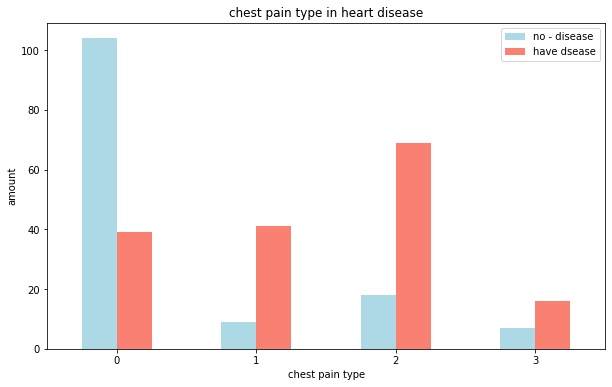

In [55]:
pd.crosstab(data.cp, data.target).plot(kind = "bar",
                                      figsize = (10,6),
                                      color = ("lightblue","salmon"));
plt.title("chest pain type in heart disease")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(["no - disease", "have dsease"])
plt.xticks(rotation = 0);

#### make a correlation matrix

In [56]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


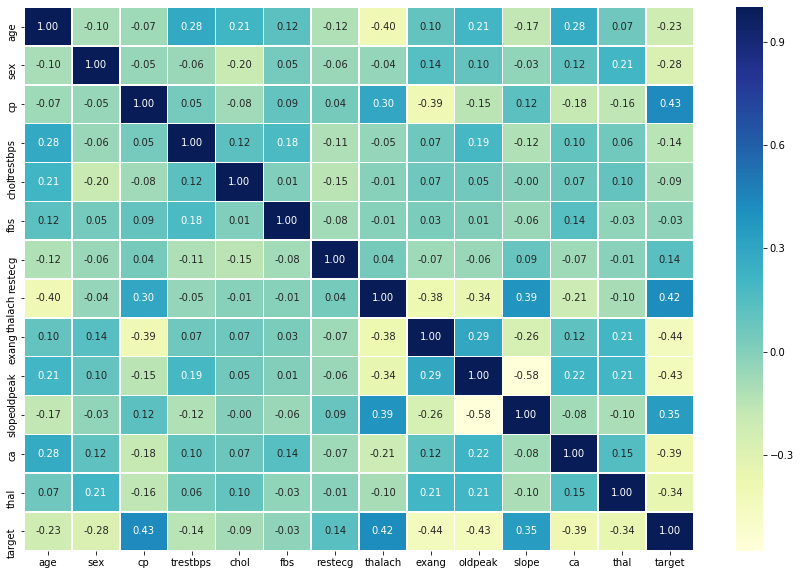

In [63]:
# lets visualize it 
# using seaborn heatmap

corr_max = data.corr()

fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_max,
              annot = True,
               linewidth = 0.5,
              fmt = ".2f",
              cmap = "YlGnBu")
# to correct bottom and top cut
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

### 5. Modeling

In [64]:
# lets see our data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# split data in to x and y
x = data.drop("target", axis = 1)
y = data["target"]

In [6]:
 # split data in to train and test set
# random seed for randomness of result
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [85]:
# put model in dictionary

models = {"logistic regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

# create a function to score and fit
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    fit and evaluate given machine learning model
    """
    # set random seed
    np.random.seed(42)
    # make a dictionary to store a score
    model_score = {}
    #loop through models
    
    for name,model in models.items():
        #fit the model
        model.fit(x_train, y_train)
        #evaluate the model and append its value to model score
        model_score[name] = model.score(x_test, y_test)
        
    return model_score

In [90]:
model_score = fit_and_score(models=models,
                            x_train = x_train,
                            x_test = x_test,
                            y_train = y_train,
                            y_test = y_test)

C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [91]:
model_score

{'logistic regression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

### model comparsion 

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

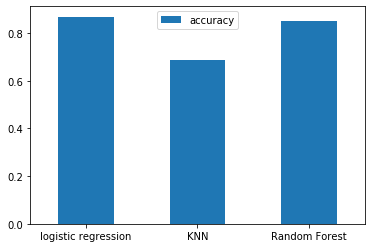

In [95]:
# lets visualize that
model_comparsion = pd.DataFrame(model_score,index=["accuracy"])
model_comparsion.T.plot(kind = "bar");
plt.xticks(rotation = 0)

In [ ]:
#this is the baseline model result so it can be tune up to better result by adjusting hyperparameters  
# model.get_params()

**lets look at the following**

* hyperparameter tunning
* feature importance
* confusion matrix
* cross_validation
* precision
* recall
* f1 score
* classification report
* roc curve
* area under the curve (AUC)

### HYPERPARAMETER TUNING

**using by hand for KNN**

In [100]:
# lets tunn KNN
# create storing list 
train_score = []
test_score = []
knn = KNeighborsClassifier()

# tunning parameter is nighbors
neighbors = range(1,21)

for i in neighbors:
    # set parameters
    knn.set_params(n_neighbors  = i)
    knn.fit(x_train,y_train)
    # update the list for stor the score
    train_score.append(knn.score(x_train, y_train))
    test_score.append(knn.score(x_test, y_test))


the maximum accuracy of KNN score on test data is : 75.41%


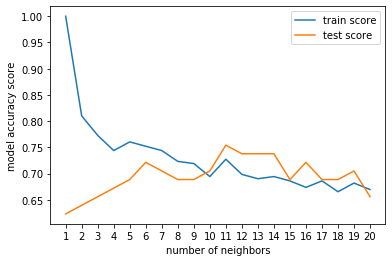

In [106]:
#test_score
# lets visualize it
plt.plot(neighbors,train_score, label = "train score")
plt.plot(neighbors, test_score, label = "test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of neighbors")
plt.ylabel("model accuracy score")
plt.legend()


print(f"the maximum accuracy of KNN score on test data is : {max(test_score)*100:.2f}%")

In [107]:
clf = LogisticRegression()
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### hyperparameter tuning with randomizedsearchCV

**logestic regression**

In [115]:
# create hyperparameter grid for logistic regression
#clf = LogisticRegression()
#clf.get_params()


log_reg_grid = {"C":np.logspace(-4, 4,20),
               "solver": ["liblinear"]}

#create hyperparameter for random forest
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)
          }

In [126]:
# tuning logistic regression
np.random.seed(42)
# model using randomizedsearchcv
clf_lgr = RandomizedSearchCV(estimator=LogisticRegression(),
                             param_distributions=log_reg_grid,
                            n_iter=20,
                            cv = 5,
                            verbose=True)
# fit to new model
clf_lgr.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
C:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributi...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [124]:
clf_lgr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [127]:
clf_lgr.score(x_test, y_test)

0.8852459016393442

**tuning random forest**

In [131]:
np.random.seed(42)
clf2 = RandomForestClassifier()
clf_rf = RandomizedSearchCV(estimator=clf2,
                             param_distributions=rf_grid,
                            n_iter=20,
                            cv = 5,
                            verbose=True)
# fit to the model
clf_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   53.8s finished
C:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [133]:
# the best hyperparameters
clf_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [134]:
# evaluation
clf_rf.score(x_test, y_test)

0.8688524590163934

### hyperparameter tuning with GridSearchCV

In [7]:
# create hyperparameter

# for logisticregression
log_grid = {"C":np.logspace(-4, 4,30),
               "solver": ["liblinear"]}

# model using new gridsearchcv

clf_gsc = GridSearchCV(LogisticRegression(),
                      param_grid=log_grid,
                      cv = 5,
                      verbose=True)
clf_gsc.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.8s finished
C:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.0000000...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.

In [8]:
# evaluaion
clf_gsc.score(x_test, y_test)

0.8852459016393442

In [12]:
# check the best hyperparameters
clf_gsc.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

**evaluation and accuracy of tunned models**

* ROC curve
* confusion matrix
* classification report
* precision score
* recall score
* F1 - score

In [9]:
# lets get y_preds (the predictin)
y_preds = clf_gsc.predict(x_test)

In [15]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [18]:
# compare with y_test

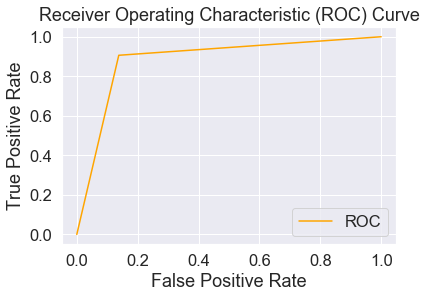

In [23]:
# ROC is the ratio of true positive rate vs false positive rate
# import roc

def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    #plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
fper, tper, thresholds = roc_curve(y_test, y_preds) 
plot_roc_cur(fper, tper)

In [18]:
# confussion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


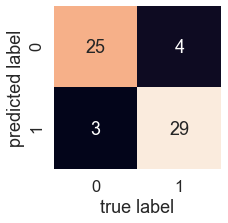

In [20]:
# using seaborn plot confusion matrix  heatmap

sns.set(font_scale=1.5)

def confu_mat_plot(y_test, y_preds):
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5);
confu_mat_plot(y_test, y_preds)



In [24]:
#classification report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evaluation materics using  cross_validation


In [25]:
clf_gsc.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [27]:
# create the new classification mode using the best parameters of logisticregression model

clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8852459016393442

In [30]:
y_preds = clf.predict(x_test)


In [34]:
# lets use cross_val for accuracy
cr_val_accuracy = cross_val_score(clf,
                                 x,
                                 y,
                                 cv = 5,
                                 scoring="accuracy")
cr_val_accuracy

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [44]:
accuracy = np.mean(cr_val_accuracy)

0.8446994535519124

In [35]:
# crossvalidation on precision
cr_val_precision = cross_val_score(clf,
                                 x,
                                 y,
                                 cv = 5,
                                 scoring="precision")
cr_val_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [43]:
precision = np.mean(cr_val_precision)

0.8207936507936507

In [36]:
# crossvalidation on recall
cr_val_recall = cross_val_score(clf,
                                 x,
                                 y,
                                 cv = 5,
                                 scoring="recall")
cr_val_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [42]:
recall = np.mean(cr_val_recall)

0.9212121212121213

In [41]:
# crossvalidation on F1
cr_val_F1 = cross_val_score(clf,
                                 x,
                                 y,
                                 cv = 5,
                                 scoring="f1")
cr_val_F1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [45]:
F1 = np.mean(cr_val_F1)

In [50]:
print(f"the accuracy of logistic regression model is: {np.mean(cr_val_accuracy)*100:.2F}%")
print(f"the precision of logistic regression model is: {np.mean(cr_val_precision)*100:.2F}%")
print(f"the recall score of logistic regression model is: {np.mean(cr_val_recall)*100:.2F}%")
print(f"the F1 score of logistic regression model is: {np.mean(cr_val_F1)*100:.2F}%")

the accuracy of logistic regression model is: 84.47%
the precision of logistic regression model is: 82.08%
the recall score of logistic regression model is: 92.12%
the F1 score of logistic regression model is: 86.73%


In [51]:
#metrics.SCORERS.keys()

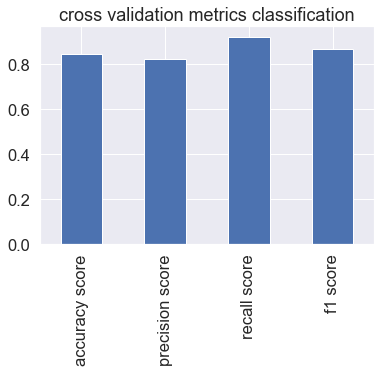

In [59]:
# visualization

cv_metics = pd.DataFrame({"accuracy score":np.mean(cr_val_accuracy),
                         "precision score": np.mean(cr_val_precision),
                         "recall score": np.mean(cr_val_recall),
                         "f1 score": np.mean(cr_val_F1)},
                        index=[0])
#cv_metics.plot.bar()
cv_metics.T.plot.bar(title = "cross validation metrics classification",
                    legend = False);
#plt.xticks(rotation=0)

### feature importance

In [60]:
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")
clf.fit(x_train, y_train);

In [62]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
# coefficients
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [65]:
# mach coeffecient of feature to columns

feature_dict = dict(zip(data.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

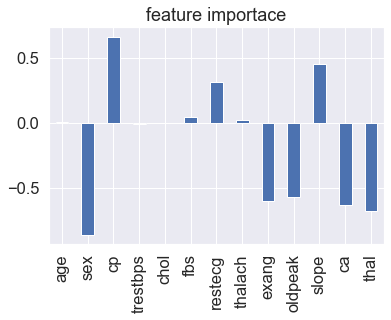

In [73]:
# lets visualize  it shows the relation between the feature for the target
featue_df = pd.DataFrame(feature_dict,index = [0])
featue_df.T.plot.bar(title = "feature importace",
                legend = False);

In [71]:
pd.crosstab(data["sex"], data["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [72]:
pd.crosstab(data["cp"],data["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16
